## Final Project Submission

Please fill out:
* Student name: **Joel Mott**
* Student pace: **self paced**
* Scheduled project review date/time: **Feb 6, 11am CST/12pm EST**
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:https://medium.com/@joel.mott8/enhancing-and-narrowing-linear-regression-results-with-outside-data-5f0d22c67132


# I. Introduction and Business Understanding

The purpose of this project is to enable a residential real estate stakeholder to make specific recommendations to families with school-age children who are considering a new home in King County, Washington. I will use public data on home sales throughout the county to offer actionable advice they may offer their clients on boith the selling and purchasing side of real estate. I go beyond home sale records to incorporate school district rankings as well.

Families with children make up a large part of the market: 55% of King County residents are either below 19 years of age or are between 25-44, which means they're at either at school age or at a time when they may be parents who are looking to buy a home in a good school district https://localscape.property/#kingcountyassessor/Overview. In terms of sellers, residing in a good school district may be a reason to raise their sale price.

I use linear regression modeling in order to account for various common factors that such families usually consider. Beginning with a baseline model as a benchmark, I add and refine multiple considerations until I have a model that outperforms said baseline while satisfying linear regression requirements. I conclude with a list of factors that families consider when buying a home along side each one's impact on sale price.

After understanding, preparing, and modelling the data along with analyzing the results, I sum up my findings and recommendations in the README and presentation files in this repository.

# II. Data Understanding

Below, I'll begin by importing the necessary libraries and original real eastate dataset. After performing some exploratory data analysis (understanding what each column means), I'll also explain how I obtained the school district rankings, or "scores", and what they mean. I'll then explain how exactly I incoporated those scores into the original dataset.

In [1]:
#avoiding a distracting Pandas warning that will pollute the notebook
# with unneeded setting-with-copy alerts:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
#Importing the needed libraries and taking a preliminary look at the dataset: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:\\Users\\joelm\\Desktop\\Flatiron School\\Phase 2\\Phase 2 Labs on GitHub\\dsc-phase-2-project-v2-3\\dsc-phase-2-project-v2-3\\data\\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()
#It looks like there are a few columns with missing information; we'll see whether
# they prove relevant to our bottom line here, though.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

I'm not sure what the 'grade' column means and I'm curious how the 'view' column is measured. Let's investigate those further:

In [4]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [5]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Ok, it looks like 'grade' isn't the slope of the lot, but the quality of building materials - it includes poor, low, fair, low average, average, good, better, very good, excellent, luxury, and mansion. Also, 'view' has five values - none, average, good, fair, excellent. Again, we'll see whether these pertain to our stakeholder's needs when it comes to informing families with school-age children on purchasing a home. 

# III. Data Preparation (along with some early modeling considerations):

## Incoporating additional data on school districts: rationales and method

Normally, outside datasets would not be incorporated before splitting the original dataset into "training" and "testing" subsets. However, in this case, the school district factors would need to be merged with the original dataset beforehand or I won't be able to split the data correctly in the first place. This shouldn't present a problem as the outside dataset on school district scores will apply to every record in the original data.

Numerous online searches suggest various factors that families prioritize with their home. Besides school districts, it looks like parents often consider the number of bedrooms and having "room to grow" (square footage). 

Below, "sds" represents a new file I created called "school_district_scores", which I made in Excel and will merge with the main dataset below. I started this Excel spreadsheet with information from the King County Tax Assessor's office, where each school district in the county is listed: https://localscape.property/#kingcountyassessor/Education

From there, I went to each district's page on www.zipdatamaps.com and started making the Excel spreadsheet with the district name and the zip codes it encompasses. Next, I went to www.niche.com to gather school district "scores." Specifically, Niche gives districts "grade" scores from 1-12, which align with the following twelve possible scores: D-/D/D+/C-/C/C+/B-/B/B+/A-/A/A+.

While some zip codes only align with one school district, some are zoned for multiple districts. Rather than spend countless hours going through each of those multi-district zip code home records to ensure I specified it's exact district, I took the average district score for each district in that zip code. 

Now that I have a spreadsheet with zip codes and district scores, I combine it with the original dataset below:

In [6]:
#I converted the Excel spreadsheet to a CSV file and merged it with the existing DataFrame on the 'zipcode' column:
sds = pd.read_csv("C:\\Users\\joelm\\Desktop\\Flatiron School\\Phase 2\\Phase 2 Labs on GitHub\\dsc-phase-2-project-v2-3\\dsc-phase-2-project-v2-3\\data\\kc_school_district_scores.csv")
sds

,zipcode,school_district_score
0,98001,8
1,98002,9
2,98003,7
3,98004,12
4,98005,12
...,...,...
88,98290,7
89,98296,10
90,98323,7
91,98354,7


In [7]:
#Making sure zip codes aren't missing:
df['zipcode'].isnull().values.any()

False

In [8]:
#Making sure I didn't duplicate any zip codes in my Excel/CSV school district scores file:
sds['zipcode'].value_counts()

98047    1
98101    1
98168    1
98158    1
98092    1
        ..
98011    1
98012    1
98272    1
98014    1
98177    1
Name: zipcode, Length: 93, dtype: int64

In [9]:
#Joining the new CSV with X_train:
df = df.merge(sds, how='inner', on='zipcode')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,school_district_score
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,8
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,NO,NONE,...,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,8
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,AVERAGE,...,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,8
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,NONE,...,1300,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,8
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,NO,NONE,...,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,8


In [10]:
#Checking whether my school_district_scores somehow include any null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     21597 non-null  int64  
 1   date                   21597 non-null  object 
 2   price                  21597 non-null  float64
 3   bedrooms               21597 non-null  int64  
 4   bathrooms              21597 non-null  float64
 5   sqft_living            21597 non-null  int64  
 6   sqft_lot               21597 non-null  int64  
 7   floors                 21597 non-null  float64
 8   waterfront             19221 non-null  object 
 9   view                   21534 non-null  object 
 10  condition              21597 non-null  object 
 11  grade                  21597 non-null  object 
 12  sqft_above             21597 non-null  int64  
 13  sqft_basement          21597 non-null  object 
 14  yr_built               21597 non-null  int64  
 15  yr

## Spltting the data to preserve training and testing integrity

Now that the district scores have been added into the original data, I perform a train-test-split before any variable transformations occur. This sets 75% of the data apart from the other 25%. The 75% will be used to "train" a model with data cleaning, modeling, and testing while I leave the other 25% completely alone. Only once the model is ready (having been trained on the first 75%), will I test it on the remaining 25%. This helps preserve the integrty of the final testing stage.

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

In [12]:
y = df[['price']]
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
X_train.shape

(16197, 21)

In [14]:
y_train.shape

(16197, 1)

In [15]:
X_test.shape

(5400, 21)

In [16]:
y_test.shape

(5400, 1)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16197 non-null  int64  
 1   date                   16197 non-null  object 
 2   bedrooms               16197 non-null  int64  
 3   bathrooms              16197 non-null  float64
 4   sqft_living            16197 non-null  int64  
 5   sqft_lot               16197 non-null  int64  
 6   floors                 16197 non-null  float64
 7   waterfront             14410 non-null  object 
 8   view                   16151 non-null  object 
 9   condition              16197 non-null  object 
 10  grade                  16197 non-null  object 
 11  sqft_above             16197 non-null  int64  
 12  sqft_basement          16197 non-null  object 
 13  yr_built               16197 non-null  int64  
 14  yr_renovated           13307 non-null  float64
 15 

## Exploring what correlates the most with sale price

Below, I use a 'heatmap' which shows the extent to which each column in our data correlates with the one we're most interested in: sale price. 

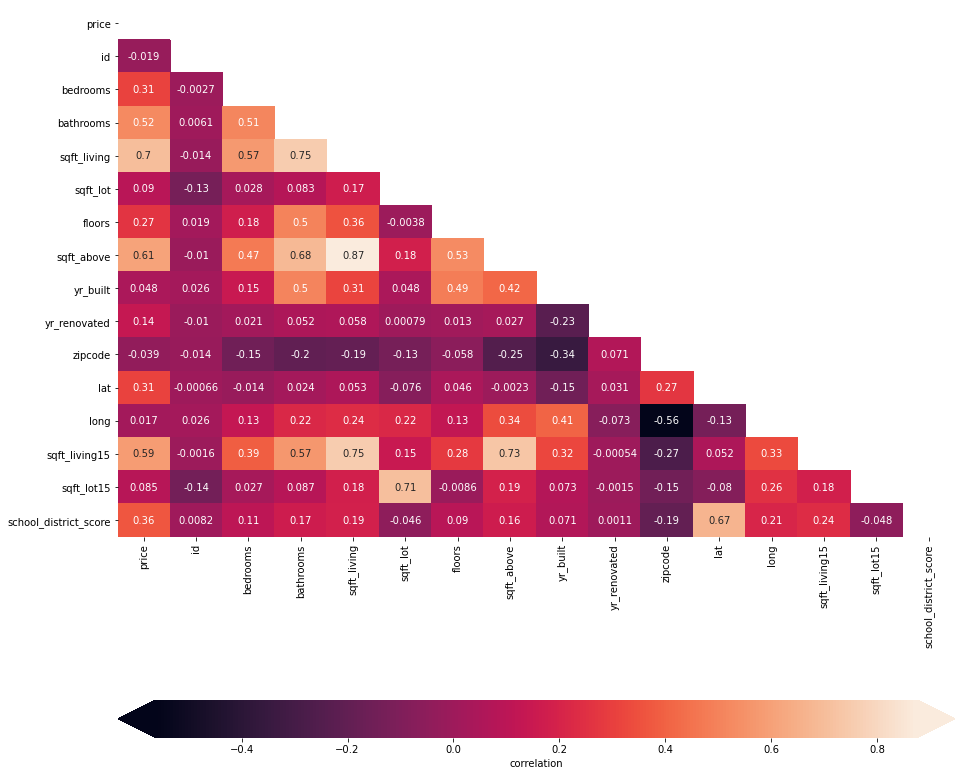

In [18]:
#Re-combining X_train with y_train so we can see the correlation heatmap
# for all of our training data:
training_data = pd.concat([y_train, X_train], axis=1)
training_data

#Building the correlation heatmap:
import seaborn as sns
heatmap_data = training_data
corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, mask=np.triu(corr), ax=ax, annot=True, 
            cbar_kws={'label':'correlation', 'orientation':'horizontal', 'pad':.2, 'extend':'both'});

It looks like 'sqft_living', aka the square footage of the living space in the home, is by far the most highly-correlated predictor for sale price. Let's take a closer look with a scatter plot graph for further insight into how these two relate:

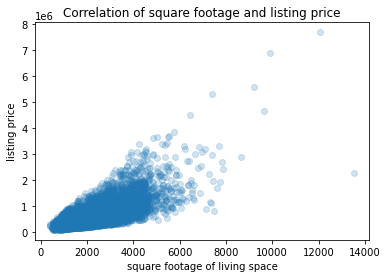

In [19]:
fig, ax = plt.subplots()
ax.scatter(X_train['sqft_living'], y_train, alpha=0.2)
ax.set_xlabel('square footage of living space')
ax.set_ylabel('listing price')
ax.set_title('Correlation of square footage and listing price');

There's definitely a strong positive correlation there, although it looks like the distribution of one or both isn't entirely normal - in other words, as we refine our approach to this data, we'll likely take a closer look at how square footage and price look just on their own. However, for purposes of our baseline model, this will serve as a good benchmark against which to compare future refinements.

Below, I create that baseline model using StatsModels. The measure of insight here is the top right number ("R-squared"). Essentially, it tells us what percent of the data can be explained by correlation between these two factors on a scale between zero and 1. Subseqeuntly, it looks like almost half the data can be explained by square footage; not a great score, but not terrible, either.

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price ~ sqft_living'
model = ols(formula=formula, data=training_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.571e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:56:08   Log-Likelihood:            -2.2463e+05
No. Observations:               16197   AIC:                         4.493e+05
Df Residuals:                   16195   BIC:                         4.493e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.311e+04   4980.254     -6.649      0.000   -4.29e+04   -2.34e+04
sqft_living   274.6815      2.192    125.331      0.000     270.386     278.977
==============================================================================
Omnibus:                    10707.172   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           374442.228
Skew:                           2.681   Prob(JB):                         0.00
Kurtosis:                      25.936   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Below, I use another method to perform another cross-validation. This is a way of testing the model, but just within the training data. This helps verify whether we're on to a meaningful correlation while leaving the true testing data alone for now.

In [21]:
from sklearn.linear_model import LinearRegression
baseline_model = LinearRegression()

In [22]:
from sklearn.model_selection import cross_validate, ShuffleSplit

most_correlated_feature = np.array(X_train['sqft_living']).reshape(-1,1)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=most_correlated_feature,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.49237215871023315
test score: 0.4911998522614051


Overall, we see a decent R-squared score. Looking back at our OLS Regression results, the condition number is quite high, although that isn't *too* big a concern when we're just working with one consideration (square footage). Nonetheless, as we iterate through more refined models, we'll want to lower that condition number because it can point to problematic distributions of factors. In this case, that may mean most of the prices are in a certain range, but a few really high prices are throwing the average off.

Looking at our intra-training-data cross-validation scores, the "test score" is comprable to the "train score" (even a little higher), so we're off to a good start with this baseline. 

# Improving our model:

Moving towards building a more sophisticated model, our previous heatmap showed a 0.36 correlation between price and school district scores, the fourth-highest among all fifteen predictors. Let's look at the extent to which this pattern visually emerges:

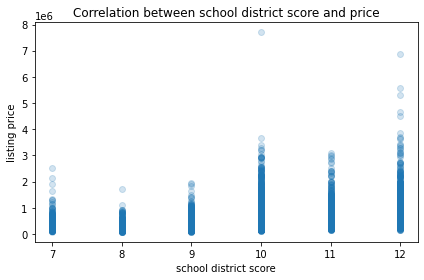

In [23]:
fig, ax = plt.subplots()
ax.scatter(X_train['school_district_score'], y_train, alpha=0.2)
ax.set_xlabel('school district score')
ax.set_ylabel('listing price')
ax.set_title('Correlation between school district score and price')
plt.tight_layout();

It looks like there's a general rise in the range of prices (both in terms of range-width and price) as the score of the school district increases. Let's construct our first model iteration here:

In [24]:
#Refit the model:
formula = 'price ~ school_district_score'
model = ols(formula=formula, data=training_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2480.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:56:09   Log-Likelihood:            -2.2897e+05
No. Observations:               16197   AIC:                         4.579e+05
Df Residuals:                   16195   BIC:                         4.580e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -3.5e+05    1.8e+04    -19.418      0.000   -3.85e+05   -3.15e+05
school_district_score  8.899e+04   1786.756     49.804      0.000    8.55e+04    9.25e+04
==============================================================================
Omnibus:                    14802.934   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1107845.335
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      42.657   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
new_predictor = np.array(X_train['school_district_score']).reshape(-1,1)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=new_predictor,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.13371856557960468
test score: 0.1307075888080913


The bad news is the R-squared value is quite lower than that of the baseline model, but the good news is the condition number is now reasonable and our cross-validation train & test scores are pretty close. 

This lower R-squared score is also not *too* surprising: we know square footage is a much stronger predictor. However, our stakeholder is likely already well aware of that. **Perhaps I can bring insight to some less well-known phenomena when it comes to buyer preference and factors that go into a seller's ability to raise their price.** 

To that end, let's see what more we can do to get a clearer picture of what school district scores bring to the table. Let's examine how each incremental increase in school district scores improves price. We can do so by splitting school_district_score into each score I found (7-12) via a method called "dummy variables". This takes categoires (7-12 scores) and turns them each into their own factor column. Ultiamtely, this will help us measure how sales price varies among different school districts.

In [26]:
school_dist_score_dummies = pd.get_dummies(X_train['school_district_score'], prefix='sds', drop_first=True)
X_train = X_train.drop('school_district_score', axis=1)
X_train = pd.concat([X_train, school_dist_score_dummies], axis=1)
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sds_8,sds_9,sds_10,sds_11,sds_12
6405,5454000010,12/10/2014,3,1.75,2020,9478,1.0,NO,NONE,Good,...,98040,47.5383,-122.238,3050,15594,0,0,0,0,1
937,9265880170,8/26/2014,4,2.50,2470,5954,2.0,NaN,NONE,Average,...,98028,47.7685,-122.236,2470,4800,0,0,0,0,1
19076,4151800470,8/20/2014,3,2.00,1010,5973,1.0,NO,NONE,Very Good,...,98033,47.6652,-122.202,1920,6015,0,0,0,0,1
15201,9272201704,5/12/2014,2,2.50,980,895,2.0,NO,NONE,Average,...,98116,47.5874,-122.386,980,899,0,0,1,0,0
13083,7151700190,3/31/2015,2,1.50,2210,5000,1.0,NO,AVERAGE,Average,...,98122,47.6122,-122.288,2700,5000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7459810210,10/2/2014,4,2.25,2050,26000,2.0,NO,NONE,Good,...,98042,47.3423,-122.063,2330,31100,0,1,0,0,0
21575,3835502815,9/25/2014,3,2.50,3110,9930,1.0,NO,FAIR,Average,...,98039,47.6112,-122.226,3650,14399,0,0,0,0,1
5390,5693500760,7/7/2014,3,1.00,1890,3330,1.5,NO,NONE,Good,...,98103,47.6597,-122.352,1530,3330,0,0,1,0,0
860,3579000410,9/5/2014,3,2.25,2010,7447,2.0,NO,NONE,Average,...,98028,47.7470,-122.248,2230,7846,0,0,0,0,1


Now that we've seperated each school district score, let's look at how they measure up in a refined correlation heatmap:

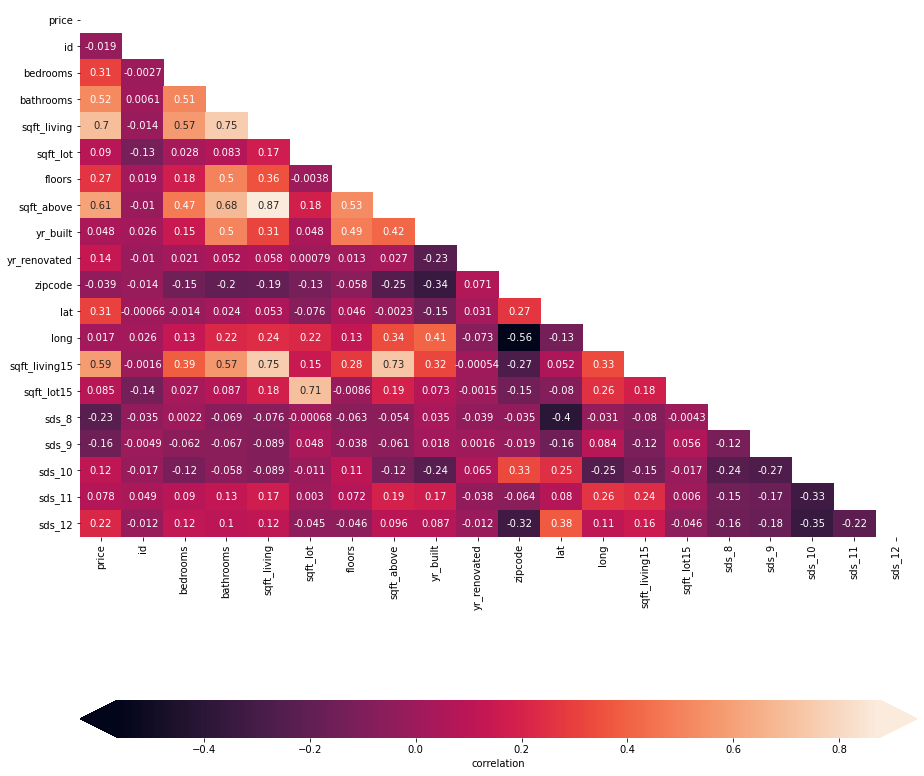

In [27]:
#Re-combine the revised X_train with y_train so we can see the heatmap with 'price':
training_data = pd.concat([y_train, X_train], axis=1)
training_data

heatmap_data = training_data
corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, mask=np.triu(corr), ax=ax, annot=True, 
            cbar_kws={'label':'correlation', 'orientation':'horizontal', 'pad':.2, 'extend':'both'});

In [28]:
#Refitting the model now that we have multiple predictors with our dummy variables:
sds_predictors = X_train[['sds_8', 'sds_9','sds_10', 'sds_11', 'sds_12']]
import statsmodels.api as sm
predictors = sm.add_constant(sds_predictors)
predictors.head()

,const,sds_8,sds_9,sds_10,sds_11,sds_12
6405,1.0,0,0,0,0,1
937,1.0,0,0,0,0,1
19076,1.0,0,0,0,0,1
15201,1.0,0,0,1,0,0
13083,1.0,0,0,1,0,0


In [29]:
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     580.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:56:15   Log-Likelihood:            -2.2879e+05
No. Observations:               16197   AIC:                         4.576e+05
Df Residuals:                   16191   BIC:                         4.576e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.187e+05   9187.772     34.688      0.000    3.01e+05    3.37e+05
sds_8      -2.426e+04   1.23e+04     -1.968      0.049   -4.84e+04    -100.530
sds_9       6.348e+04   1.18e+04      5.374      0.000    4.03e+04    8.66e+04
sds_10      2.771e+05   1.02e+04     27.178      0.000    2.57e+05    2.97e+05
sds_11      2.815e+05   1.12e+04     25.235      0.000     2.6e+05    3.03e+05
sds_12       3.83e+05    1.1e+04     34.908      0.000    3.61e+05    4.04e+05
==============================================================================
Omnibus:                    14975.031   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1178690.495
Skew:                           4.213   Prob(JB):                         0.00
Kurtosis:                      43.933   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
predictors = np.array(predictors).reshape(-1,6)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=predictors,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.1527755364843322
test score: 0.15015524120036328


We only see a meager increase in the R-squared score even though we're getting more refined coefficients when it comes to each step up between school district scores. 

Also, the standard errors have increased to around ten thousand dollars, but in the big picture of home prices, that isn't too bad. The p-values are all pretty good as well (these tell us the correlations we're seeing aren't happening by chance), with the exception of 'sds_8', which is right on the cusp of the standard alpha threshold of 0.05. 

Also, the condition number fell quite a bit, so multicollinearity (factors influencing other factors and muddeling the model) probably isn't an issue, but I think that's a bit of a truism based on the nature of the predictors in this model. It's also good to see the train & test cross-validation scores are still close.

Looking at my predictors of interest in the school district rankings, while all the correlations are not *particularly* strong, they are almost entirely consistent and they span zero. In other words, the lower-scoring districs negatively correlate with price while the higher-scoring ones incrementally show a rising, positive correlation. 

What's also noteworthy is that nothing is more negatively correlated with price than the two lowest-scoring school districts. Additionally, after all the square footage/room and latitude predictors, the next-highest correlation would be the highest-ranking school districts.

Let's continue carefully adding predictors to our model. Let's see the extent to which the bedroom count and overall square footage influence this model.

First, let's check whether 'sqft_living' shows a normal distribution. In other words, does square footage among these homes show a bell curve, where the average square footage is near the middle? Or are there a few really big or small houses throwing things off?

In [31]:
from scipy.stats import skew
skewness = skew(X_train['sqft_living'])
print("skew of X_train's 'sqft_living':", skewness)

skew of X_train's 'sqft_living': 1.4956470762604674


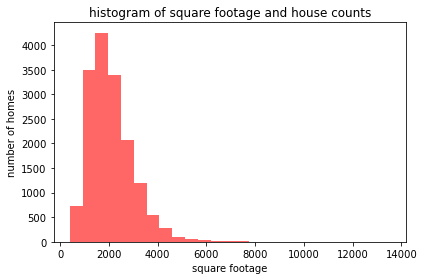

In [32]:
fig, ax = plt.subplots()

ax.hist(X_train['sqft_living'], bins=25, color='r', alpha=0.6)
ax.set_title('histogram of square footage and house counts')
ax.set_xlabel('square footage')
ax.set_ylabel('number of homes')
plt.tight_layout()
plt.savefig('histogram of square footage and house counts.jpg');

It looks like this column's distribution is skewed; a few large homes are pulling the average higher. This can degrade our predictions for how square footage impacts price. However, there are steps we can take to reorder how this data is distrbuted without distorting its values. This is referred to as a logarithmic transformation. One does not need to understand the details of how it works, other than it reorders and measures the data differently such that we wind up with a more accurate prediction:

In [33]:
X_train['sqft_living_log'] = np.log(X_train['sqft_living'])

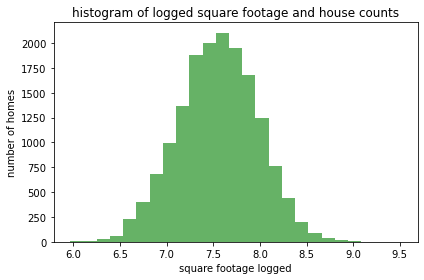

In [34]:
fig, ax = plt.subplots()

ax.hist(X_train['sqft_living_log'], bins=25, color='g', alpha=0.6)
ax.set_title('histogram of logged square footage and house counts')
ax.set_xlabel('square footage logged')
ax.set_ylabel('number of homes')
plt.tight_layout()
plt.savefig('histogram of logged square footage and house counts.jpg');

In [35]:
skewness = skew(X_train['sqft_living_log'])
print("skew of X_train's 'sqft_living_log':", skewness)

skew of X_train's 'sqft_living_log': -0.026733420175554485


Now that our predictors are looking more managable and/or normally distributed, let's recombine them to our predictor list:

In [36]:
#predictors = X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
#                      'bdrm_3', 'bdrm_4', 'bdrm_5', 'bdrm_6', 'bdrm_7',\
#                      'bdrm_8', 'bdrm_9', 'bdrm_10', 'sqft_living_log']]
#predictors = X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
#                      'bdrm_3', 'bdrm_4', 'bdrm_5', 'bdrm_6', 'bdrm_7',\
#                      'bdrm_8', 'bdrm_9', 'bdrm_10', 'sqft_living']]
X_train_predictors = X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12', 'bedrooms', 'sqft_living_log']]
X_train_predictors = sm.add_constant(X_train_predictors)
X_train_predictors.head()

,const,sds_8,sds_9,sds_10,sds_11,sds_12,bedrooms,sqft_living_log
6405,1.0,0,0,0,0,1,3,7.610853
937,1.0,0,0,0,0,1,4,7.811973
19076,1.0,0,0,0,0,1,3,6.917706
15201,1.0,0,0,1,0,0,2,6.887553
13083,1.0,0,0,1,0,0,2,7.700748


Now let's see how our model performs with a new factor included:

In [37]:
final_model = sm.OLS(y_train, X_train_predictors).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     2155.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:56:18   Log-Likelihood:            -2.2479e+05
No. Observations:               16197   AIC:                         4.496e+05
Df Residuals:                   16189   BIC:                         4.497e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.647e+06    4.2e+04    -86.725      0.000   -3.73e+06   -3.56e+06
sds_8           -1.749e+04   9633.176     -1.815      0.069   -3.64e+04    1395.061
sds_9            8.169e+04   9231.684      8.849      0.000    6.36e+04    9.98e+04
sds_10           2.631e+05   7973.889     32.999      0.000    2.47e+05    2.79e+05
sds_11           1.626e+05   8794.470     18.494      0.000    1.45e+05     1.8e+05
sds_12           2.915e+05   8620.634     33.810      0.000    2.75e+05    3.08e+05
bedrooms        -3.602e+04   2776.314    -12.976      0.000   -4.15e+04   -3.06e+04
sqft_living_log  5.464e+05   6200.999     88.112      0.000    5.34e+05    5.59e+05
==============================================================================
Omnibus:                    15971.330   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2151606.294
Skew:                           4.492   Prob(JB):                         0.00
Kurtosis:                      58.745   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#predictors = np.array(predictors).reshape(-1,15)
#y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=X_train_predictors,
                y=y_train,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.48400059971188386
test score: 0.4792475653337674


Our R-squared metric is still 0.009 smaller than our baseline. I hesitate to add any further predictors (considerations) because we want to keep it relevant to what families with school-age children are looking for. However, we *did* notice earlier that the distribution between square footage and sale price was off. While we transformed the square footage column in order to work with a better distribution, perhaps we should also look at the sale price column. 

In [39]:
skewness = skew(y_train)
print("skew of y_train, aka 'price':", skewness)

skew of y_train, aka 'price': [3.82104252]


Anythong over 1.0 is heavily skewed, so sale_price could also benefit from a logarithmic transformation like we did earlier with square_footage.

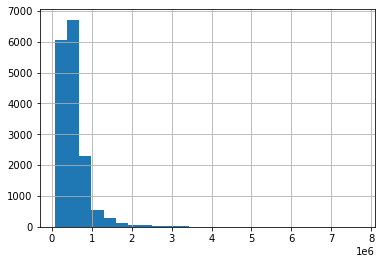

In [40]:
y_train['price'].hist(bins=25);

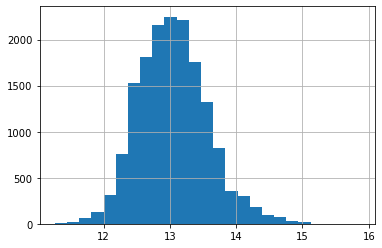

In [41]:
y_train['price_log'] = np.log(y_train['price'])
y_train['price_log'].hist(bins=25);

In [42]:
model = sm.OLS(y_train['price_log'], X_train_predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     4444.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:56:19   Log-Likelihood:                -3866.8
No. Observations:               16197   AIC:                             7750.
Df Residuals:                   16189   BIC:                             7811.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.4022      0.050    127.700      0.000       6.304       6.500
sds_8              -0.0376      0.011     -3.277      0.001      -0.060      -0.015
sds_9               0.1984      0.011     18.020      0.000       0.177       0.220
sds_10              0.5746      0.010     60.432      0.000       0.556       0.593
sds_11              0.4277      0.010     40.790      0.000       0.407       0.448
sds_12              0.5943      0.010     57.824      0.000       0.574       0.614
bedrooms           -0.0516      0.003    -15.600      0.000      -0.058      -0.045
sqft_living_log     0.8498      0.007    114.944      0.000       0.835       0.864
==============================================================================
Omnibus:                      287.438   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.046
Skew:                           0.189   Prob(JB):                     2.79e-96
Kurtosis:                       3.714   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=X_train_predictors,
                y=y_train['price_log'],
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.6561979643566505
test score: 0.6618249012665269


Our R-squared metric has substantially surpassed the baseline and we still have a reasonable condition number. This looks like a good place to finalize our model and then begin testing it on the 25%-sized test data we set aside earlier.

In [44]:
final_model = LinearRegression().fit(X_train_predictors, y_train['price_log'])

# Evaluation

In order to accurately test our test data, we'll single out the same predictors (columns) we did in the training data and apply the same logarithmic transformations to square_footage and sale_price:

In [45]:
school_dist_score_dummies_X_test = pd.get_dummies(X_test['school_district_score'], prefix='sds', drop_first=True)
X_test = X_test.drop('school_district_score', axis=1)
X_test = pd.concat([X_test, school_dist_score_dummies_X_test], axis=1)
X_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sds_8,sds_9,sds_10,sds_11,sds_12
3686,8024201370,12/8/2014,2,1.00,880,5111,1.0,NO,NONE,Average,...,98115,47.6997,-122.314,1370,5111,0,0,1,0,0
10247,6073300040,1/6/2015,4,2.25,2020,12500,2.0,NO,NONE,Fair,...,98056,47.5403,-122.175,1800,13175,0,0,0,1,0
4037,431500155,10/24/2014,5,1.75,2020,6565,1.0,NO,NONE,Average,...,98115,47.6821,-122.283,2020,6552,0,0,1,0,0
3437,7237450110,7/1/2014,4,2.50,2530,5048,2.0,NO,NONE,Average,...,98038,47.3559,-122.063,2530,4359,0,0,1,0,0
19291,3982700250,4/23/2015,4,2.50,3030,7800,2.0,NO,NONE,Average,...,98033,47.6890,-122.196,2840,7435,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,1672000170,9/8/2014,3,1.75,1890,11141,1.0,NO,NONE,Good,...,98006,47.5697,-122.163,2720,11144,0,0,0,1,0
15003,148000680,10/27/2014,3,1.75,1660,4800,1.0,NO,NONE,Average,...,98116,47.5734,-122.412,1510,4800,0,0,1,0,0
13478,7133300380,2/9/2015,4,2.50,2500,4000,2.0,NO,NONE,Average,...,98144,47.5902,-122.311,1480,4300,0,0,1,0,0
18399,9346920260,6/4/2014,4,2.25,2500,8500,1.0,NaN,NONE,Good,...,98006,47.5615,-122.131,2290,8927,0,0,0,1,0


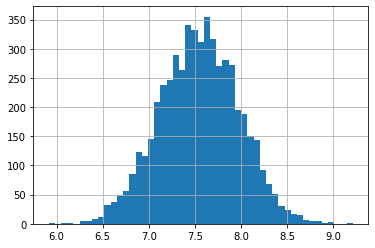

In [46]:
X_test['sqft_living_log'] = np.log(X_test['sqft_living'])
#X_test.rename(columns = {'sqft_living': 'sqft_living_log'}, inplace = True)
X_test['sqft_living_log'].hist(bins='auto');

In [47]:
final_X_test_predictors = X_test[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
                                  'bedrooms', 'sqft_living_log']]
final_X_test_predictors = sm.add_constant(final_X_test_predictors)
#final_X_test_predictors = np.array(final_X_test_predictors).reshape(-1,9)
final_X_test_predictors

,const,sds_8,sds_9,sds_10,sds_11,sds_12,bedrooms,sqft_living_log
3686,1.0,0,0,1,0,0,2,6.779922
10247,1.0,0,0,0,1,0,4,7.610853
4037,1.0,0,0,1,0,0,5,7.610853
3437,1.0,0,0,1,0,0,4,7.835975
19291,1.0,0,0,0,0,1,4,8.016318
...,...,...,...,...,...,...,...,...
18276,1.0,0,0,0,1,0,3,7.544332
15003,1.0,0,0,1,0,0,3,7.414573
13478,1.0,0,0,1,0,0,4,7.824046
18399,1.0,0,0,0,1,0,4,7.824046


In [48]:
#Now you do the log trans to y_test
y_test['price_log'] = np.log(y_test['price'])
y_test['price_log']

3686     12.899220
10247    12.834681
4037     13.369223
3437     12.942849
19291    13.592242
           ...    
18276    13.262125
15003    13.180632
13478    13.361380
18399    13.378555
2358     13.060488
Name: price_log, Length: 5400, dtype: float64

In [49]:
#Double check the score method on the training data
final_model.score(X_train_predictors, y_train['price_log'])

0.657713270695718

In [50]:
#Now we see how the final model performs on the test data:
final_model.score(final_X_test_predictors, y_test['price_log'])

0.6647947116293913

In [51]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=final_model,
                X=final_X_test_predictors,
#               y=final_y_test,
                y=y_test['price_log'],
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.6634949326313587
test score: 0.6719941961233485


Now that our model is seemingly performing well on the test data, let's make sure we're satisfying the requirements of linear regression. Below, I run tests to ensure that the final predictions and data are shaped correctly in order to bring about a meaningful and accurate metric.

In [52]:
y_hat = final_model.predict(final_X_test_predictors)
y_hat

array([12.6353259 , 13.09136919, 13.18656924, ..., 13.41938967,
       13.27255017, 12.90392159])

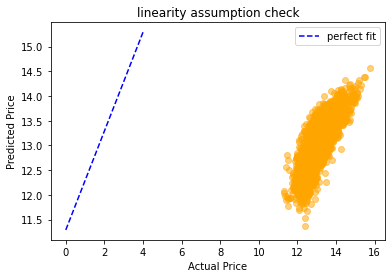

In [70]:
fig, ax = plt.subplots()

perfect_line = np.arange(y_test['price_log'].min(), y_test['price_log'].max())
ax.plot(perfect_line, linestyle="--", color="blue", label="perfect fit")
ax.scatter(y_test['price_log'], y_hat, color="orange", alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title("linearity assumption check")
ax.legend();

In [54]:
#training data predictors
lm_train_predictions = final_model.predict(X_train_predictors)

In [55]:
lm_train_predictions

array([13.30963805, 13.42891979, 12.72057105, ..., 13.23331591,
       13.30542045, 13.49106649])

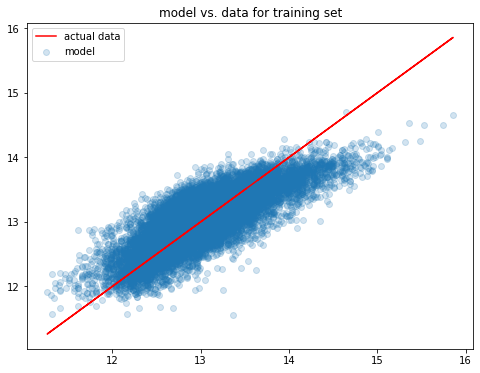

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(y_train['price_log'], lm_train_predictions, alpha=0.2, label="model")
plt.plot(y_train['price_log'], y_train['price_log'], color='r', label="actual data")
plt.title("model vs. data for training set")
plt.legend();

In [57]:
y_test

,price,price_log
3686,400000.0,12.899220
10247,375000.0,12.834681
4037,640000.0,13.369223
3437,417838.0,12.942849
19291,799900.0,13.592242
...,...,...
18276,575000.0,13.262125
15003,530000.0,13.180632
13478,635000.0,13.361380
18399,646000.0,13.378555


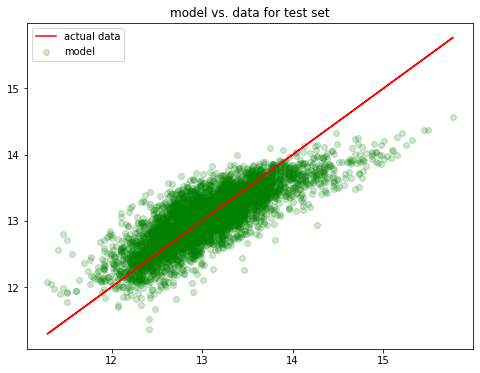

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(y_test['price_log'], y_hat, color='g', alpha=0.2, label="model")
plt.plot(y_test['price_log'], y_test['price_log'], color='r', label="actual data")
plt.title("model vs. data for test set")
plt.legend();

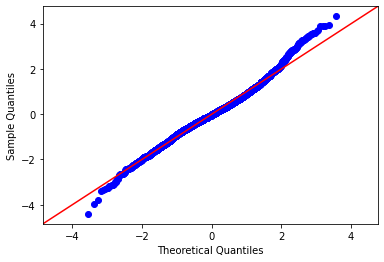

In [59]:
import scipy.stats as stats
#residuals = (final_y_test_unlogged - lm_test_predictions_unlogged)
residuals = (y_test['price_log'] - y_hat)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show();

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_predictors.values, i) for i in range(X_train_predictors.shape[1])]
pd.Series(vif, index=X_train_predictors.columns, name="Variance Inflation Factor")

const              431.124531
sds_8                2.026806
sds_9                2.225005
sds_10               3.500015
sds_11               2.633709
sds_12               2.754409
bedrooms             1.628954
sqft_living_log      1.675282
Name: Variance Inflation Factor, dtype: float64

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test['price_log'], final_model.predict(final_X_test_predictors), squared=False)

0.30730551041170767

It looks like having logarithmically transformed our target variable improved our model's performance in regard to the R-squared score, RSME, and abiding by the assumptions of linear regression. Let's see if I can "un-log" the logged variables (price & square footage) in order to obtain more meaningful coefficients:

In [62]:
#First we isolate the coefficients from the final_model:
final_model_coef = final_model.coef_ #index=final_X_test_predictors.columns, name="Coefficients")
final_model_coef

array([ 0.        , -0.03764127,  0.19835002,  0.57455439,  0.42771489,
        0.59434432, -0.05163944,  0.84984404])

In [63]:
final_model_coef_df = pd.DataFrame(final_model_coef)

In [64]:
#Now we pass an operation to "unlog" them, turning them into percentage changes instead except for 
# 'sqft_living_log' because it's already logged, so it already shows the percentage change:
final_model_unlogged_showing_percentages_instead = final_model_coef_df.apply(lambda \
                                                    x: (np.exp(x)-1)*100 \
                                                    if x.index is x < 7 | x.index >= 8 else x)   
final_model_unlogged_showing_percentages_instead

,0
0,0.000000
1,-0.037641
2,0.198350
3,0.574554
4,0.427715
5,0.594344
6,-0.051639
7,0.849844


In [65]:
index = ['constant', 'sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
        'bedrooms', 'sqft_living_log']

final_model_unlogged_showing_percentages_instead.index =  list(index)
final_model_unlogged_showing_percentages_instead

,0
constant,0.000000
sds_8,-0.037641
sds_9,0.198350
sds_10,0.574554
sds_11,0.427715
sds_12,0.594344
bedrooms,-0.051639
sqft_living_log,0.849844


In [66]:
LRresult = (model.summary().tables[1])
LRresult

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.4022,0.050,127.700,0.000,6.304,6.500
sds_8,-0.0376,0.011,-3.277,0.001,-0.060,-0.015
sds_9,0.1984,0.011,18.020,0.000,0.177,0.220
sds_10,0.5746,0.010,60.432,0.000,0.556,0.593
sds_11,0.4277,0.010,40.790,0.000,0.407,0.448
sds_12,0.5943,0.010,57.824,0.000,0.574,0.614
bedrooms,-0.0516,0.003,-15.600,0.000,-0.058,-0.045
sqft_living_log,0.8498,0.007,114.944,0.000,0.835,0.864


In [67]:
index = ['', 'constant', 'sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
        'bedrooms', 'sqft_living_log']
ols_summary = pd.DataFrame(LRresult, 
                           index=index, 
                           columns = ['variable_name', 'coef', 'standard error', \
                                      't-value', 'P>|t|', '[0.025', '0.975]'])
ols_summary

,variable_name,coef,standard error,t-value,P>|t|,[0.025,0.975]
,,coef,std err,t,P>|t|,[0.025,0.975]
constant,const,6.4022,0.050,127.700,0.000,6.304,6.500
sds_8,sds_8,-0.0376,0.011,-3.277,0.001,-0.060,-0.015
sds_9,sds_9,0.1984,0.011,18.020,0.000,0.177,0.220
sds_10,sds_10,0.5746,0.010,60.432,0.000,0.556,0.593
sds_11,sds_11,0.4277,0.010,40.790,0.000,0.407,0.448
sds_12,sds_12,0.5943,0.010,57.824,0.000,0.574,0.614
bedrooms,bedrooms,-0.0516,0.003,-15.600,0.000,-0.058,-0.045
sqft_living_log,sqft_living_log,0.8498,0.007,114.944,0.000,0.835,0.864


In [68]:
final_model_results = pd.concat([final_model_unlogged_showing_percentages_instead, ols_summary], axis=1)
final_model_results = final_model_results.drop(['variable_name', 'coef'], axis=1)
final_model_results = final_model_results.drop(final_model_results.tail(1).index)
final_model_results = final_model_results.rename(columns={0: 'coefficient as %'})
final_model_results

,coefficient as %,standard error,t-value,P>|t|,[0.025,0.975]
constant,0.000000,0.050,127.700,0.000,6.304,6.500
sds_8,-0.037641,0.011,-3.277,0.001,-0.060,-0.015
sds_9,0.198350,0.011,18.020,0.000,0.177,0.220
sds_10,0.574554,0.010,60.432,0.000,0.556,0.593
sds_11,0.427715,0.010,40.790,0.000,0.407,0.448
sds_12,0.594344,0.010,57.824,0.000,0.574,0.614
bedrooms,-0.051639,0.003,-15.600,0.000,-0.058,-0.045
sqft_living_log,0.849844,0.007,114.944,0.000,0.835,0.864


In summary, this final model takes into account factors that atter to families with school age children, such as school districts, number of bedrooms, square footage, and the time of year families tend to move. The school district scores were seperated out, giving each district "grade" its own category using one-hot encoding. In order to avoid issues of multicollinearity, the first category ('sds_7') was dropped and considered the reference category. Subsequently, sds_8 through sds_12 show price percentage change from that reference sds_7. 

We see that, moving up from a district grade of 7, sds_8 has a negligible effect on price, while sds_9 through sds_12 show larger impacts on listing price. Interestingly, sds_10 shows a higher price increase than 11, but this may be due to the fact that there are more homes in school districts with a 10 grade score. 

It turns out that, despite what I often saw when searching for family home-buying priorities, the number of bedrooms didn't have too signficiant an impact on price. What's more is that price tended to *decrease* with more bedrooms. This may be due to the fact that King County spans urban, suburban, and rural areas and smaller homes in Seattle may sell for much more than larger homes further from the city. 

As we learned from our correlation heatmap earlier, no other single predictor increases listing price as much as square footage. While our stakeholder is almost certainly already well aware of this, the model can help inform them that each percentage increase in square footage correlates with a 0.86% increase in listing price, giving them more specific pricing recommendations to seller and buyers considering bids.

Finally, while most families with school-age children move during the summer months when school isn't in session, they wouldn't have to worry about factoring that in to their bids; summer shows almost no correlation to listing price. 

Each of these correlations show a p-value less than the standard 0.05 alpha level. The model also has a reasonable condition number that shows multicollinearity and distributions of variables are not too big a concern. While the R-sqaured value of 0.666 isn't remarkably high, the tradeoff is more specific insight into a subgroup of buyers.

In terms of our stakeholder, they could use this information to help advise seller clients on what to factor in when deciding on a listing price. While not every buyer is weighing options with kids in mind, those residing in higher-scoring school districts may want to consider raising their listing price accordingly. Buyers with kids can be informed on how much more to expect per school district score when it comes to placing a successful bid on a home. Ultimately, our stakeholder would be equipped on specific percentages from familial predictors to advise clients on both the selling and buying side of real estate.